In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Leer el dataset
df = pd.read_csv('base_encuestados_v2.csv')

# Preprocesar los comentarios (si no lo has hecho ya)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar stopwords, lematizador y stemmer
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('spanish')

# Función de preprocesamiento de texto
def preprocess_text(text):
    # Eliminar caracteres especiales y convertir a minúsculas
    text = re.sub(r'\W', ' ', str(text))
    # Eliminar palabras que contienen números
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.lower()
    
    # Tokenización
    words = text.split()
    
    # Eliminación de stop words, lematización y stemming
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

# Aplicar la función de preprocesamiento a la columna 'Comentarios'
df['cleaned_comment'] = df['Comentarios'].apply(preprocess_text)

# Vectorización y entrenamiento del modelo Naive Bayes
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_comment'])
y = df['NPS']  # Variable objetivo

model = MultinomialNB()
model.fit(X, y)

# Obtener las palabras del vocabulario
feature_names = tfidf.get_feature_names_out()

# Obtener las probabilidades logarítmicas de las características para cada clase
log_prob = model.feature_log_prob_

# Convertir a DataFrame para facilitar la visualización
log_prob_df = pd.DataFrame(log_prob, columns=feature_names, index=model.classes_)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIRGINIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIRGINIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:

# Mostrar las 10 palabras más importantes para la clase DETRACTOR
print("Top words for class DETRACTOR:")
top_words_detractor = log_prob_df.loc['DETRACTOR'].sort_values(ascending=False).head(20)
print(top_words_detractor)
print("\n")


Top words for class DETRACTOR:
seguro         -5.388208
si             -5.935876
mas            -6.019865
rimac          -6.131060
información    -6.160955
nunca          -6.375341
beneficios     -6.506320
correo         -6.516955
solo           -6.527377
años           -6.562334
comunicación   -6.562817
informacion    -6.578828
dijeron        -6.587720
hacer          -6.659588
ustedes        -6.662694
mejorar        -6.667219
cliente        -6.740617
pago           -6.747662
tener          -6.794764
servicio       -6.796266
Name: DETRACTOR, dtype: float64




In [4]:

# Mostrar las 10 palabras más importantes para la clase PROMOTOR
print("Top words for class PROMOTOR:")
top_words_promotor = log_prob_df.loc['PROMOTOR'].sort_values(ascending=False).head(20)
print(top_words_promotor)
print("\n")


Top words for class PROMOTOR:
seguro        -4.898504
atención      -4.958481
trámite       -5.020391
buena         -5.025306
información   -5.038253
rápido        -5.098081
ejecutivo     -5.143673
servicio      -5.150181
brinda        -5.155863
rimac         -5.183398
bien          -5.261285
constante     -5.305689
siempre       -5.318126
atencion      -5.344731
empresa       -5.456804
cobertura     -5.561888
buen          -5.674462
problema      -5.713599
si            -5.733343
rápida        -5.777093
Name: PROMOTOR, dtype: float64




In [5]:

# Mostrar las 10 palabras más importantes para la clase PASIVO
print("Top words for class PASIVO:")
top_words_pasivo = log_prob_df.loc['PASIVO'].sort_values(ascending=False).head(20)
print(top_words_pasivo)
print("\n")


Top words for class PASIVO:
mas            -4.939556
seguro         -5.132083
información    -5.482793
si             -5.599455
mayor          -5.767998
beneficios     -5.946843
rimac          -5.956169
informacion    -6.010239
tener          -6.056881
correo         -6.097267
comunicación   -6.134404
cobertura      -6.161455
veces          -6.190462
ser            -6.192751
atención       -6.215388
mejorar        -6.222449
hacer          -6.241669
cliente        -6.243339
tema           -6.252650
clínicas       -6.345166
Name: PASIVO, dtype: float64




In [6]:

# Contar palabras más frecuentes en cada clase
def get_top_words_by_class(df, class_label, top_n=100):
    # Filtrar comentarios por clase
    comments = df[df['NPS'] == class_label]['cleaned_comment']
    # Unir todos los comentarios en una sola cadena de texto
    all_words = ' '.join(comments).split()
    # Contar las palabras
    word_counts = Counter(all_words)
    # Obtener las palabras más comunes
    return word_counts.most_common(top_n)

# Mostrar las palabras más frecuentes para cada clase
print("Most frequent words for class DETRACTOR:")
print(get_top_words_by_class(df, 'DETRACTOR'))
print("\n")

print("Most frequent words for class PROMOTOR:")
print(get_top_words_by_class(df, 'PROMOTOR'))
print("\n")

print("Most frequent words for class PASIVO:")
print(get_top_words_by_class(df, 'PASIVO'))
print("\n")


Most frequent words for class DETRACTOR:
[('seguro', 2330), ('si', 1331), ('rimac', 1008), ('mas', 947), ('información', 667), ('hacer', 474), ('dijeron', 473), ('ustedes', 457), ('nunca', 455), ('años', 441), ('solo', 428), ('servicio', 401), ('correo', 391), ('beneficios', 360), ('tiempo', 350), ('tener', 349), ('momento', 344), ('atención', 340), ('año', 333), ('tema', 330), ('vez', 326), ('cliente', 321), ('ahora', 320), ('pago', 320), ('carro', 299), ('informacion', 299), ('ser', 299), ('comunicación', 298), ('pagar', 295), ('persona', 293), ('hace', 292), ('veces', 277), ('tenia', 271), ('cobertura', 271), ('dicen', 262), ('mejorar', 260), ('va', 254), ('bien', 249), ('llamar', 248), ('soles', 238), ('cubre', 232), ('clinica', 231), ('dan', 229), ('voy', 226), ('atencion', 223), ('clinicas', 219), ('seguros', 219), ('cuenta', 216), ('taller', 215), ('dos', 214), ('ejemplo', 211), ('creo', 209), ('cada', 209), ('meses', 206), ('ver', 201), ('dijo', 200), ('dinero', 200), ('dar', 1

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import joblib

# Cargar el dataset principal
df = pd.read_csv('base_encuestados_v2.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = df['Comentarios']
y = df['NPS']

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Leer los tokens de TokensFinales.txt
with open('TokensFinales.txt', 'r') as file:
    tokens = [line.strip() for line in file]

# Verificar la presencia de tokens en los comentarios
def contains_token(comment, tokens):
    for token in tokens:
        if token in comment:
            return True
    return False

# Filtrar los comentarios que contienen alguno de los tokens
df_test_filtered = df[df['id_persona_token'].apply(lambda x: contains_token(x, tokens))]
df_train_filtered = df[~df['id_persona_token'].apply(lambda x: contains_token(x, tokens))]

# Dividir los datos filtrados en características y etiquetas para el conjunto de prueba
X_test_filtered = df_test_filtered['Comentarios']
y_test_filtered = df_test_filtered['NPS']

# Dividir los datos filtrados en características y etiquetas para el conjunto de entrenamiento
X_train_filtered = df_train_filtered['Comentarios']
y_train_filtered = df_train_filtered['NPS']

# Transformar las etiquetas de texto a etiquetas numéricas
y_train_filtered_encoded = label_encoder.fit_transform(y_train_filtered)
y_test_filtered_encoded = label_encoder.transform(y_test_filtered)

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

# Transformar el texto en vectores TF-IDF
X_train_filtered_tfidf = vectorizer.fit_transform(X_train_filtered)
X_test_filtered_tfidf = vectorizer.transform(X_test_filtered)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_filtered_encoded), y=y_train_filtered_encoded)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Crear y entrenar el modelo Random Forest con pesos de clase
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)
rf_classifier.fit(X_train_filtered_tfidf, y_train_filtered_encoded)

# Guardar el modelo y el vectorizador
#joblib.dump(rf_classifier, 'rf_classifier.joblib')
#joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
#joblib.dump(label_encoder, 'label_encoder.joblib')

# Hacer predicciones en el conjunto de prueba filtrado
y_pred_filtered = rf_classifier.predict(X_test_filtered_tfidf)

# Convertir las etiquetas numéricas predichas de vuelta a etiquetas de texto
y_test_filtered_labels = label_encoder.inverse_transform(y_test_filtered_encoded)
y_pred_filtered_labels = label_encoder.inverse_transform(y_pred_filtered)

# Imprimir el informe de clasificación
print(classification_report(y_test_filtered_labels, y_pred_filtered_labels))


              precision    recall  f1-score   support

   DETRACTOR       0.54      0.15      0.23       634
      PASIVO       0.70      0.61      0.65      1408
    PROMOTOR       0.76      0.97      0.85      2292

    accuracy                           0.73      4334
   macro avg       0.67      0.57      0.58      4334
weighted avg       0.71      0.73      0.69      4334



In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier  # Importar Random Forest

# Cargar el dataset
df = pd.read_csv('base_encuestados_v2.csv')

# Lista de palabras clave
palabras_clave = ["mas", "dijeron", "nunca", "no", 'deben', 'llame', 'falta', 'hacer', 'mejorar','mayor','solo','tener']

# Codificar la columna NPS
label_mapping = {'DETRACTOR': 0, 'PASIVO': 1, 'PROMOTOR': 2}
df['NPS_Label'] = df['NPS'].map(label_mapping)

# Función para determinar si un comentario contiene alguna palabra clave
def contiene_palabra_clave(comentario):
    comentario = comentario.lower()
    count = 0
    for palabra in palabras_clave:
        if palabra in comentario:
            count += 1
    # Devolver un valor proporcional a la cantidad de palabras clave encontradas
    if count == 0:
        return 1  # Si no se encuentra ninguna palabra clave
    else:
        return 1 / count  # Retornar un valor inversamente proporcional al número de palabras clave encontradas

# Aplicar la función de detección de palabras clave
df['sentiment'] = df['Comentarios'].apply(contiene_palabra_clave)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['sentiment']], df['NPS_Label'], test_size=0.1, random_state=42)

# Inicializar Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo
classifier.fit(X_train, y_train)

# Predecir con el conjunto de prueba
predictions = classifier.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Imprimir el informe de clasificación
print(classification_report(y_test, predictions, target_names=['DETRACTOR', 'PASIVO', 'PROMOTOR']))


Accuracy: 0.6927396710790212
              precision    recall  f1-score   support

   DETRACTOR       0.00      0.00      0.00       273
      PASIVO       0.51      0.31      0.38       602
    PROMOTOR       0.73      0.95      0.82      1618

    accuracy                           0.69      2493
   macro avg       0.41      0.42      0.40      2493
weighted avg       0.59      0.69      0.63      2493



In [35]:
import pandas as pd

df_matriz = pd.read_csv('matriz_variables.csv')
df_casos = pd.read_csv('base_casos_salesforce_rimac.csv')
df_financieros = pd.read_csv('base_informacion_financiera.csv')
df_productos = pd.read_csv('base_productos_rimac.csv')
df_siniestros = pd.read_csv('base_siniestros_rimac.csv')
df_encuestados = pd.read_csv('base_encuestados_v2.csv')


C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\2866761043.py:3: DtypeWarning: Columns (149) have mixed types. Specify dtype option on import or set low_memory=False.
  df_matriz = pd.read_csv('matriz_variables.csv')


In [101]:
# join datasets por id_persona_token y quiero mantener todos los datos como base de base_encuestados_v2
df = pd.merge(df_encuestados, df_siniestros, on='id_persona_token', how='left')

NPS                   DETRACTOR  PASIVO  PROMOTOR
des_estado_siniestro                             
ANULADO                    1726    5174     13247
CANCELADO                     0       0         3
CERRADO                   50365  145872    399126
EN PROCESO                 4221    9337     28527
OBSERVADO                   902    2597      6939
PENDIENTE                     9      13        34
RECHAZADO                   103     148       386


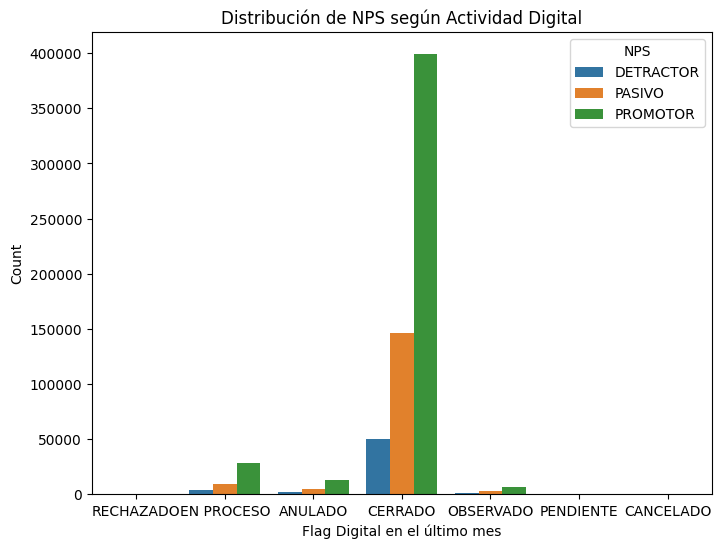

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tabla de contingencia entre flg_dig_u1m y NPS
contingency_table = pd.crosstab(df['des_estado_siniestro'], df['NPS'])
print(contingency_table)

# Gráfico de barras para visualizar la distribución de NPS según flg_dig_u1m
plt.figure(figsize=(8, 6))
sns.countplot(x='des_estado_siniestro', hue='NPS', data=df)
plt.xlabel('Flag Digital en el último mes')
plt.ylabel('Count')
plt.title('Distribución de NPS según Actividad Digital')
plt.legend(title='NPS')
plt.show()


NPS         DETRACTOR  PASIVO  PROMOTOR
flg_sf_u1m                             
0.0              1193    2701      7127
1.0               220     471      1956


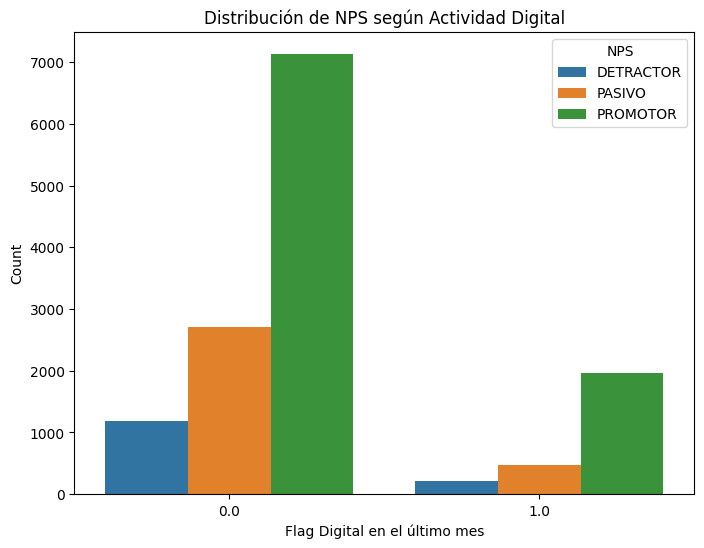

In [17]:
# Tabla de contingencia entre flg_dig_u1m y NPS
contingency_table = pd.crosstab(df['flg_sf_u1m'], df['NPS'])
print(contingency_table)


plt.figure(figsize=(8, 6))
sns.countplot(x='flg_sf_u1m', hue='NPS', data=df)
plt.xlabel('Flag Digital en el último mes')
plt.ylabel('Count')
plt.title('Distribución de NPS según Actividad Digital')
plt.legend(title='NPS')
plt.show()

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\445582162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NPS', y='num_antiguedad_cliente', data=df, palette='viridis')


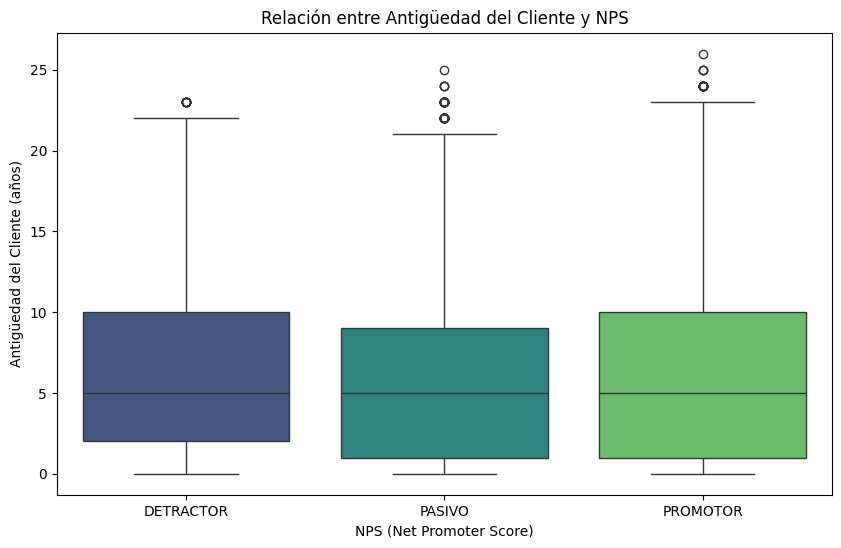

In [18]:
# Graficar usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='NPS', y='num_antiguedad_cliente', data=df, palette='viridis')
plt.title('Relación entre Antigüedad del Cliente y NPS')
plt.xlabel('NPS (Net Promoter Score)')
plt.ylabel('Antigüedad del Cliente (años)')
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable NPS
label_encoder = LabelEncoder()
df['NPS_encoded'] = label_encoder.fit_transform(df['NPS'])

In [156]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable NPS
label_encoder = LabelEncoder()
df['NPS_encoded'] = label_encoder.fit_transform(df['NPS'])
#df = df.dropna(axis=1)
print(df.shape)

(24394, 325)


In [159]:
import numpy as np
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Inicializar el MinMaxScaler
scaler = MinMaxScaler

# Ajustar y transformar las columnas numéricas
#df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

# Eliminar la columna NPS_encoded de las columnas numéricas
numeric_columns = numeric_columns.drop(columns=['NPS_encoded'])

# Calcular la matriz de correlación solo para las columnas numéricas con respecto a NPS_encoded
corr_matrix = numeric_columns.corrwith(df['NPS_encoded'])

# Convertir a DataFrame para facilitar la manipulación
corr_df = pd.DataFrame(corr_matrix, columns=['correlation'])

# Ordenar por valor absoluto de correlación en orden descendente
corr_df_sorted = corr_df.iloc[abs(corr_df['correlation']).argsort()[::-1]]

print(corr_df_sorted.head(20))

print(df['recencia_contratacion_PATRI'])

                             correlation
Categoria                       0.891807
nro_certificados_PATRI          0.057467
nro_productos_PATRI             0.055738
flg_sf_EMAIL_u1m                0.054791
ratio_sf_EMAIL_u3m              0.053383
flg_sf_u1m                      0.051236
avg_nro_productos_u12m          0.049599
recencia_contratacion_PATRI     0.047883
edad                            0.047736
flg_alto_valor                 -0.047635
ratio_sf_EMAIL_u6m              0.046929
recencia_contratacion_SALUD    -0.046372
avg_nro_productos_u6m           0.046363
flg_empleado_rimac              0.045302
avg_nro_productos_u3m           0.044798
ratio_sf_EMAIL_u12m             0.044265
nro_productos                   0.043723
ratio_sf_u3m                    0.043188
flg_empleado_breca              0.041780
num_productos                   0.041776
2961     34
2962     31
2963     17
2964     20
2965      9
         ..
27350     0
27351     0
27352    34
27353     0
27354     0
Name: r

In [67]:
df = pd.merge(df_encuestados, df_financieros, on='id_persona_token', how='left')

In [68]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable NPS
label_encoder = LabelEncoder()
df['NPS_encoded'] = label_encoder.fit_transform(df['Categoria'])

In [69]:
import numpy as np
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Inicializar el MinMaxScaler
scaler = MinMaxScaler

# Ajustar y transformar las columnas numéricas
#df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

# Eliminar la columna NPS_encoded de las columnas numéricas
numeric_columns = numeric_columns.drop(columns=['NPS_encoded'])

# Calcular la matriz de correlación solo para las columnas numéricas con respecto a NPS_encoded
corr_matrix = numeric_columns.corrwith(df['NPS_encoded'])

# Convertir a DataFrame para facilitar la manipulación
corr_df = pd.DataFrame(corr_matrix, columns=['correlation'])

# Ordenar por valor absoluto de correlación en orden descendente
corr_df_sorted = corr_df.iloc[abs(corr_df['correlation']).argsort()[::-1]]

print(corr_df_sorted.head(20))

                               correlation
Categoria                         1.000000
mto_saldo_tc_sbs                  0.022255
ctd_ent_sbs                       0.019500
flg_rcc_perdida                   0.010159
mto_max_linea_tc                  0.009163
mto_saldo_prest_pers_sbs          0.008517
mto_saldo_cred_vehi_sbs           0.008395
mto_saldo_cred_hipo_sbs          -0.005752
mto_linea_cred_vehi_sbs          -0.002598
mto_linea_cred_hipo_sbs          -0.002562
indice_consumo_total_linea_tc     0.001978
mto_saldo_sbs                     0.001550


In [51]:
df = pd.merge(df_encuestados, df_casos, on='id_persona_token', how='left')

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\2513007537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')


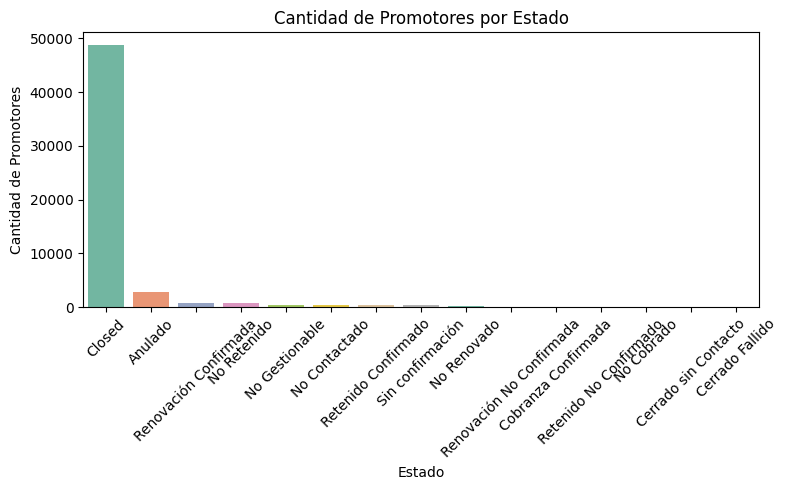

Cantidad de promotores por estado:
estado
Closed                      48675
Anulado                      2785
Renovación Confirmada         868
No Retenido                   810
No Gestionable                441
No Contactado                 421
Retenido Confirmado           381
Sin confirmación              350
No Renovado                   131
Renovación No Confirmada      102
Cobranza Confirmada            49
Retenido No Confirmado         46
No Cobrado                     25
Cerrado sin Contacto           24
Cerrado Fallido                 8
Name: count, dtype: int64


In [52]:

promotores_por_estado = df[df['NPS'] == 'PROMOTOR']['estado'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')
plt.title('Cantidad de Promotores por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Promotores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Cantidad de promotores por estado:")
print(promotores_por_estado)

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\2213462292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')


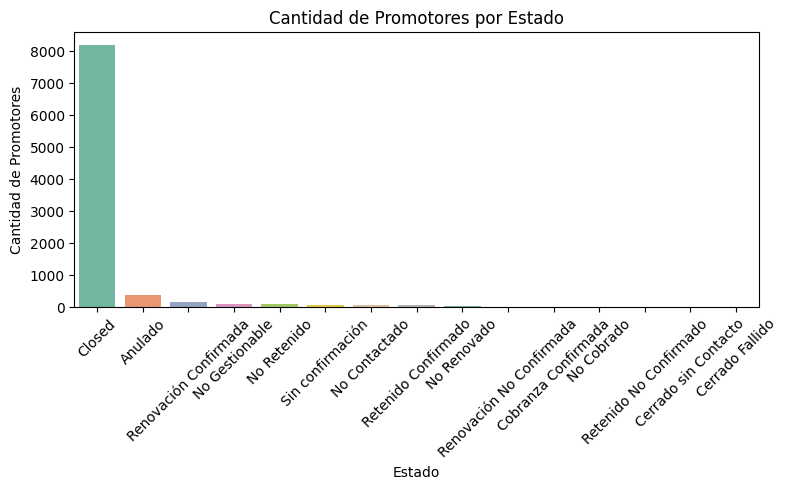

Cantidad de promotores por estado:
estado
Closed                      8175
Anulado                      395
Renovación Confirmada        148
No Gestionable               113
No Retenido                  107
Sin confirmación              79
No Contactado                 79
Retenido Confirmado           66
No Renovado                   40
Renovación No Confirmada      16
Cobranza Confirmada           13
No Cobrado                    10
Retenido No Confirmado         9
Cerrado sin Contacto           7
Cerrado Fallido                2
Name: count, dtype: int64


In [53]:

promotores_por_estado = df[df['NPS'] == 'DETRACTOR']['estado'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')
plt.title('Cantidad de Promotores por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Promotores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Cantidad de promotores por estado:")
print(promotores_por_estado)

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\333490935.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')


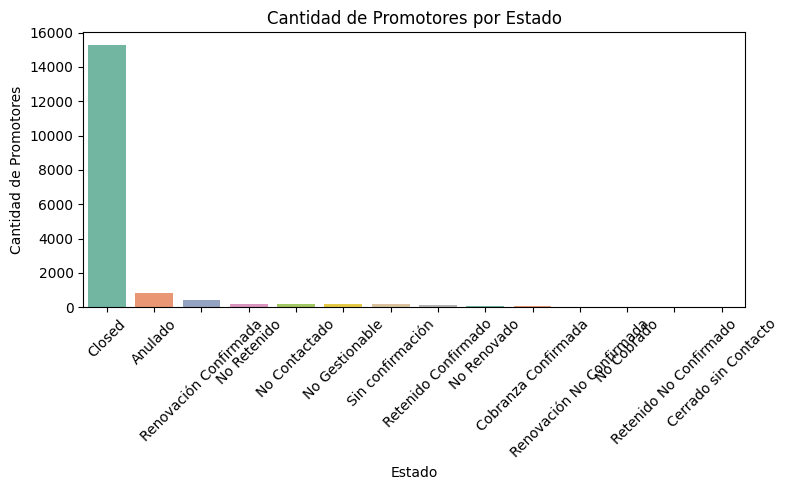

Cantidad de promotores por estado:
estado
Closed                      15251
Anulado                       852
Renovación Confirmada         396
No Retenido                   210
No Contactado                 184
No Gestionable                176
Sin confirmación              167
Retenido Confirmado           140
No Renovado                    58
Cobranza Confirmada            41
Renovación No Confirmada       34
No Cobrado                     11
Retenido No Confirmado          8
Cerrado sin Contacto            7
Name: count, dtype: int64


In [54]:

promotores_por_estado = df[df['NPS'] == 'PASIVO']['estado'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')
plt.title('Cantidad de Promotores por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Promotores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Cantidad de promotores por estado:")
print(promotores_por_estado)

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\1083858235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')


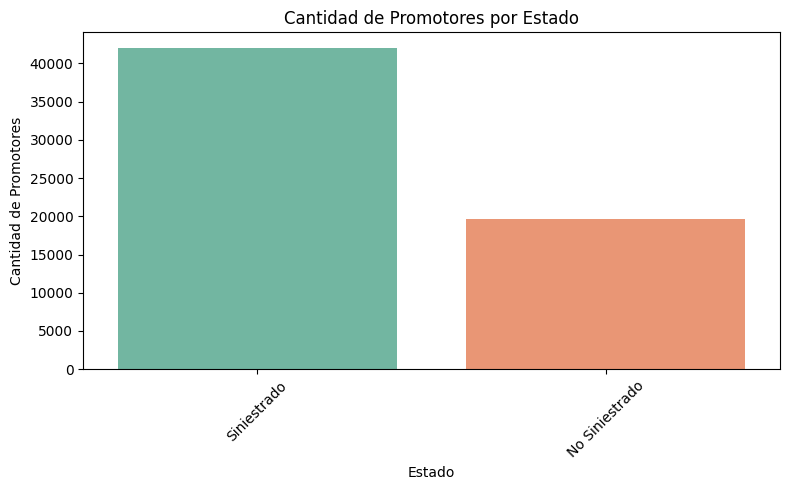

Cantidad de promotores por estado:
Siniestralidad_encuesta
Siniestrado       41978
No Siniestrado    19649
Name: count, dtype: int64


In [56]:

promotores_por_estado = df[df['NPS'] == 'PROMOTOR']['Siniestralidad_encuesta'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')
plt.title('Cantidad de Promotores por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Promotores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Cantidad de promotores por estado:")
print(promotores_por_estado)

C:\Users\VIRGINIA\AppData\Local\Temp\ipykernel_2032\1177861606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')


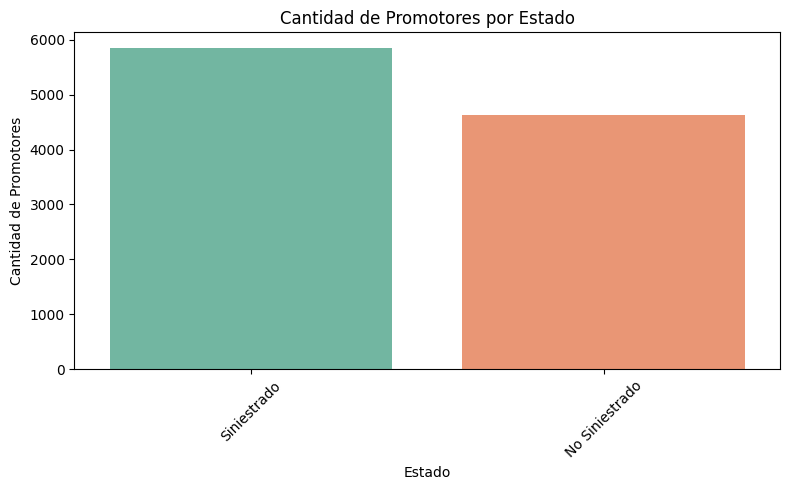

Cantidad de promotores por estado:
Siniestralidad_encuesta
Siniestrado       5842
No Siniestrado    4635
Name: count, dtype: int64


In [57]:

promotores_por_estado = df[df['NPS'] == 'DETRACTOR']['Siniestralidad_encuesta'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=promotores_por_estado.index, y=promotores_por_estado.values, palette='Set2')
plt.title('Cantidad de Promotores por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Promotores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Cantidad de promotores por estado:")
print(promotores_por_estado)

In [63]:
df1 = pd.merge(df_encuestados, df_matriz, on='id_persona_token', how='left')

In [64]:
df = pd.merge(df_encuestados, df_matriz, on='id_persona_token', how='left')
df = pd.merge(df, df_casos, on='id_persona_token', how='left')
df = pd.merge(df, df_financieros, on='id_persona_token', how='left')
